In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size
import os
path=os.getcwd()
#path=("C:/Users/billb/OneDrive - Kansas State University/allor/Data/Totals/")
path=("/Users/preciousallor/Library/CloudStorage/OneDrive-KansasStateUniversity/Documents - William Blankenau's files/allor/Data/Totals/")

In [2]:
#read in pickle data
df=pd.read_pickle(path + "Global-Productivity-Sectoral-Database.pkl")

In [3]:
df.columns

Index(['year', 'country', 'AGRvanom', 'MINvanom', 'MANvanom', 'UTIvanom',
       'CONvanom', 'TRSvanom', 'TRAvanom', 'FINvanom', 'OTHvanom', 'TOTvanom',
       'AGRvareal', 'MINvareal', 'MANvareal', 'UTIvareal', 'CONvareal',
       'TRSvareal', 'TRAvareal', 'FINvareal', 'OTHvareal', 'TOTvareal',
       'AGRemp', 'MINemp', 'MANemp', 'UTIemp', 'CONemp', 'TRSemp', 'TRAemp',
       'FINemp', 'OTHemp', 'TOTemp', 'AGRlpreal', 'MINlpreal', 'MANlpreal',
       'UTIlpreal', 'CONlpreal', 'TRSlpreal', 'TRAlpreal', 'FINlpreal',
       'OTHlpreal', 'TOTlpreal', 'AGRlppp', 'MINlppp', 'MANlppp', 'UTIlppp',
       'CONlppp', 'TRSlppp', 'TRAlppp', 'FINlppp', 'OTHlppp', 'TOTlppp',
       'region'],
      dtype='object', name='sector')

In [4]:
df.rename(columns={'AGRvareal':'AGRva',
                   'MINvareal':'MINva',
                     'MANvareal':'MANva',
                     'UTIvareal':'UTIva',
                    'CONvareal':'CONva',
                    'TRSvareal':'TRSva',
                    'TRAvareal':'TRAva',
                    'FINvareal':'FINva',
                    'OTHvareal':'OTHva',
                     'TOTvareal':'TOTva',}, inplace=True)


In [5]:
df2=df[['country','year','region','AGRva','MINva','MANva','UTIva','CONva','TRSva','TRAva','FINva','OTHva','TOTva','AGRemp','MINemp','MANemp','UTIemp','CONemp','TRSemp','TRAemp','FINemp','OTHemp','TOTemp']]

In [6]:
#create 5 year intervals for the data
df2_5yr=df2[df2['year']%5==0]

In [7]:
df2_5yr['SERva']=df2_5yr['UTIva'] + df2_5yr['TRSva'] + df2_5yr['TRAva'] + df2_5yr['FINva'] + df2_5yr['OTHva']
df2_5yr['SERemp']=df2_5yr['UTIemp'] + df2_5yr['TRSemp'] + df2_5yr['TRAemp'] + df2_5yr['FINemp'] + df2_5yr['OTHemp']
df2_5yr['INDva']=df2_5yr['MINva'] + df2_5yr['MANva'] + df2_5yr['CONva']
df2_5yr['INDemp']=df2_5yr['MINemp'] + df2_5yr['MANemp'] + df2_5yr['CONemp']

/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_4898/2149920099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_5yr['SERva']=df2_5yr['UTIva'] + df2_5yr['TRSva'] + df2_5yr['TRAva'] + df2_5yr['FINva'] + df2_5yr['OTHva']
/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_4898/2149920099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_5yr['SERemp']=df2_5yr['UTIemp'] + df2_5yr['TRSemp'] + df2_5yr['TRAemp'] + df2_5yr['FINemp'] + df2_5yr['OTHemp']
/var/folders/41/vdz4x2j921n9ntzc

In [8]:
df2_5yr_final=df2_5yr[['country','year','region', 'AGRva', 'AGRemp', 'INDva', 'INDemp', 'SERva', 'SERemp', 'TOTva', 'TOTemp']]

In [9]:
df2_5yr_final.rename(columns={'INDva':'MANva',
                             'INDemp':'MANemp'}, inplace=True)

/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_4898/3246459860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_5yr_final.rename(columns={'INDva':'MANva',


In [10]:
df2_5yr_final.columns

Index(['country', 'year', 'region', 'AGRva', 'AGRemp', 'MANva', 'MANemp',
       'SERva', 'SERemp', 'TOTva', 'TOTemp'],
      dtype='object', name='sector')

In [11]:
#dropping missing values aand zeros
df2_5yr_final=df2_5yr_final.dropna()
df2_5yr_final =df2_5yr_final[~(df2_5yr_final == 0).any(axis=1)]

In [12]:
list(df2_5yr_final['region'].unique())

['Latin America and the Caribbean',
 'Advanced Economies',
 'East Asia and Pacific',
 'Africa',
 'South Asia',
 'Middle East',
 'Europe and Central Asia']

In [13]:
#shorten region names
df2_5yr_final['region'].replace({'Latin America and the Caribbean':'LAC',
                                'Africa': 'AFR',
                                'Advanced Economies':'AE',
                                'Europe and Central Asia':'ECA',
                                'South Asia':'SA',
                                'East Asia and Pacific':'EAP',
                                'Middle East':'ME'}, inplace=True)


In [14]:
#create a new group of advanced economies and emerging and developing economies
df2_5yr_final['region2']=df2_5yr_final['region']
df2_5yr_final['region2'].replace({'AE':'AE',
                                'EAP':'EMDE',
                                'SA':'EMDE',
                                'AFR':'EMDE',
                                'LAC':'EMDE',
                                'ECA':'EMDE',
                                'ME':'EMDE'}, inplace=True)

In [15]:
#Generating list of all variables to be created.
list1=['AGR', 'MAN','SER']
emp_list = [i+'emp' for i in list1] 
emp_list2 = [i+'emp2' for i in list1]
va_list=[i+'va' for i in list1]  
prod_list = [i+'p' for i in list1]
empshare_list = [ i  + "empshare" for i in list1]
tech_list = [i + "tech" for  i in list1]
pc_list= [i + "pchange" for i in list1]
lagemp_list= [i + "lagempshare" for i in list1]
cemp_list= [i + "cempshare" for i in list1]
sch_list= [i + "sch" for i in list1]
aggprod_list=[i + "agg" for i in list1]
num_list=[i + "num" for i in list1]
num2_list=[i + "num2" for i in list1]

In [16]:
for i in range(len(prod_list)):
   df2_5yr_final[prod_list[i]]= df2_5yr_final[va_list[i]]/df2_5yr_final[emp_list[i]]

In [17]:
for i in range(len(empshare_list)):
      df2_5yr_final[empshare_list[i]]  = df2_5yr_final[emp_list[i]]/ df2_5yr_final['TOTemp']

In [18]:
for i in range(len(aggprod_list)):
   df2_5yr_final[aggprod_list[i]]=df2_5yr_final[prod_list[i]]* df2_5yr_final[empshare_list[i]]
df2_5yr_final['AGGprod']=df2_5yr_final[aggprod_list].sum(axis=1, min_count=3)

In [19]:
#This creates the  change in sectoral productivity
grouped =df2_5yr_final.groupby('country')
df2_5yr_final[pc_list]=grouped[prod_list].diff()
df2_5yr_final['lagg']=grouped['AGGprod'].shift(1)
#This creates the lag values of the employment shares
df2_5yr_final[lagemp_list]=grouped[empshare_list].shift(1)
#This generates the within component of productivity growth.
for i in range(len(tech_list)):
    df2_5yr_final[tech_list[i]] = df2_5yr_final[pc_list[i]]*df2_5yr_final[lagemp_list[i]]
#sum up the variables in tech_list to get the within component of productivity growth
df2_5yr_final['within_gr'] = df2_5yr_final[tech_list].sum(axis=1,min_count=3)/df2_5yr_final['lagg']
df2_5yr_final['within']=df2_5yr_final['within_gr']*100

In [20]:
#This creates  the changes in the sectoral employment shares
grouped = df2_5yr_final.groupby('country')
df2_5yr_final[cemp_list]=grouped[empshare_list].diff()

#This creates the product of the change in sector employment shares and the sector productivity.
for i in range(len(sch_list)):
    df2_5yr_final[sch_list[i]] =df2_5yr_final[cemp_list[i]]*df2_5yr_final[prod_list[i]]
#summing up the structural change components for the sectors
df2_5yr_final['structuralchange_gr']= df2_5yr_final[sch_list].sum(axis=1, min_count=3)/df2_5yr_final['lagg']
df2_5yr_final['structuralchange']=df2_5yr_final['structuralchange_gr']*100

In [21]:
#Generating the LHS by country
df2_5yr_final['prod']= df2_5yr_final.groupby('country')['AGGprod'].pct_change()
df2_5yr_final['prod_gr']=df2_5yr_final['prod']*100
#gernerating the difference.
df2_5yr_final['diff']=df2_5yr_final['prod_gr']- df2_5yr_final['within']-df2_5yr_final['structuralchange']
#checking the summary statistics of the difference and i think they are pretty close to zero.
df2_5yr_final['diff'].describe()

count    7.120000e+02
mean    -3.658692e-17
std      1.187790e-14
min     -3.730349e-14
25%     -7.105427e-15
50%      0.000000e+00
75%      7.414208e-15
max      3.841372e-14
Name: diff, dtype: float64

In [22]:
df2_5yr_final['within_share']=df2_5yr_final['within_gr']/df2_5yr_final['prod']*100
df2_5yr_final['structural_share']=df2_5yr_final['structuralchange_gr']/df2_5yr_final['prod']*100

In [23]:
#load pickle data
averages=pd.read_pickle(path + "averages.pkl")

In [24]:
averages.columns

Index(['country', 'year', 'human_capital', 'log_gdppc', 'pop_gr', 'TFP',
       'log_cap_stock', 'government_gross_debt_gdp', 'trade_openness',
       'initial_gdp_pc', 'log_initial_gdp_pc'],
      dtype='object')

In [25]:
#re-checking if countries are the same in the two datasets
df_not_av = df2_5yr_final[~df2_5yr_final['country'].isin(averages['country'])]['country'].unique()
df_not_av

['United Republic of Tanzania', 'Republic of Korea', 'Taiwan', 'China, Hong Kong SAR', 'Lao People's Dem Rep', 'Iran']
Categories (103, object): ['Algeria' < 'Angola' < 'Argentina' < 'Australia' ... 'United States' < 'Uruguay' < 'Viet Nam' < 'Zambia']

In [26]:
list(averages['country'].unique())

['Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Hong Kong',
 'China, Macao SAR',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Curaçao',
 '

In [27]:
averages['country'].replace({'Tanzania, United Republic of':'United Republic of Tanzania',
                              'Korea, Republic of':'Republic of Korea',
                                'Taiwan, Province of China':'Taiwan',
                                'Hong Kong':'China, Hong Kong SAR',
                                "Lao People's Democratic Republic":'Lao People\'s Dem Rep',
                                'Iran, Islamic Rep.':'Iran'}, inplace=True)

In [28]:
df2_5yr_final=df2_5yr_final.merge(averages, on=['country','year'], how='inner')

In [29]:
#sort the data by country and year
df2_5yr_final.sort_values(['country','year'], inplace=True)
df2_5yr_final

,country,year,region,AGRva,AGRemp,MANva,MANemp,SERva,SERemp,TOTva,...,structural_share,human_capital,log_gdppc,pop_gr,TFP,log_cap_stock,government_gross_debt_gdp,trade_openness,initial_gdp_pc,log_initial_gdp_pc
409,Algeria,2000.0,AFR,5.221556e+05,1382.475000,4.674838e+06,1467.441000,2.506932e+06,3422.151948,7.703926e+06,...,NaN,1.915188,8.972260,0.014448,NaN,14.224008,54.088620,62.104975,5142.384004,8.545272
506,Algeria,2005.0,AFR,7.498081e+05,1587.423000,5.797462e+06,2119.814000,3.244748e+06,4801.575893,9.792018e+06,...,-49.195971,1.992268,9.298330,0.016791,NaN,14.425900,17.004043,72.391118,6834.553880,8.829746
609,Algeria,2010.0,AFR,1.015300e+06,1187.005000,5.956500e+06,2915.488000,4.678100e+06,5925.209922,1.164990e+07,...,434.874485,2.112403,9.494369,0.019306,NaN,14.588330,9.110986,65.754216,9969.622609,9.207298
712,Algeria,2015.0,AFR,1.427941e+06,906.526000,6.272896e+06,3120.951000,6.355147e+06,6445.575172,1.405598e+07,...,-6.275254,2.303490,9.553065,0.017416,NaN,14.605443,28.212058,56.163500,12587.744251,9.440479
507,Angola,2005.0,AFR,3.224587e+05,2448.782000,2.784124e+06,550.021000,2.156825e+06,3376.149929,5.263408e+06,...,NaN,1.380059,8.598823,0.038216,1.014662,13.084708,21.970988,110.617408,2013.636230,7.607697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,Zambia,1995.0,AFR,6.847125e+03,1900.752563,1.402293e+04,143.577560,2.352136e+04,455.945910,4.439141e+04,...,61.621830,2.086534,7.158937,0.029077,0.714724,11.799132,223.842000,61.467792,1285.000000,7.158514
505,Zambia,2000.0,AFR,7.304280e+03,2014.027954,1.193379e+04,150.768002,3.066553e+04,647.632003,4.990360e+04,...,-16969.066074,2.103928,7.378761,0.028880,0.799763,11.449661,166.230815,64.619634,1180.943802,7.074069
608,Zambia,2005.0,AFR,7.612896e+03,2318.518555,1.963924e+04,210.917408,3.882181e+04,616.528808,6.607395e+04,...,-25.784580,2.185294,7.748593,0.030279,0.963274,11.686303,20.673389,60.280966,1428.502354,7.264382
711,Zambia,2010.0,AFR,9.158700e+03,2694.342285,2.955730e+04,268.444302,5.312040e+04,766.535373,9.183640e+04,...,31.951067,2.331342,8.097651,0.031238,1.139329,12.456436,24.825373,75.973207,1970.018679,7.585798


#### Descriptive Statistics

In [30]:
# Define a custom formatter
formatter = lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.')

In [31]:
df3=df2_5yr_final[['country','year','region','within','structuralchange','prod_gr','government_gross_debt_gdp','trade_openness','initial_gdp_pc','log_initial_gdp_pc','log_cap_stock','log_gdppc','pop_gr','TFP','human_capital']]

In [32]:
#get summary statistics for all variables and export as a latex table
summary=df3.describe().T
summary=summary[['mean','std','min','max','count']]
summary=summary.applymap(formatter)
summary.to_latex(path+'summary.tex')
summary

,mean,std,min,max,count
year,1994.66,15.64,1950,2015,815
within,8.01,13.39,-46.8,74.3,712
structuralchange,2.94,4.99,-23.25,27.83,712
prod_gr,10.94,14.42,-44.63,73.91,712
government_gross_debt_gdp,54.32,34.02,0.97,236.1,700
trade_openness,77.24,57.8,6.3,425.16,695
initial_gdp_pc,12852.34,13501.77,612,134802.78,778
log_initial_gdp_pc,8.86,1.18,6.42,11.81,778
log_cap_stock,12.8,2.23,6.58,18.26,805
log_gdppc,9.05,1.19,6.62,11.95,782


In [33]:
list(df2_5yr_final['region2'].unique())

['EMDE', 'AE']

In [35]:

#compute value added shares 
df2_5yr_final['AGRva_share']=df2_5yr_final['AGRva']/df2_5yr_final['TOTva']
df2_5yr_final['MANva_share']=df2_5yr_final['MANva']/df2_5yr_final['TOTva']
df2_5yr_final['SERva_share']=df2_5yr_final['SERva']/df2_5yr_final['TOTva']

In [36]:
#compute the average of "prod_gr", "structuralchange", "within" for each region
list4=['AGRtech', 'MANtech', 'SERtech','AGRsch', 'MANsch', 'SERsch', 'AGRempshare', 'MANempshare', 'SERempshare','AGRva_share', 'MANva_share', 'SERva_share']
for i in list4:
    df2_5yr_final[i+'_mean'] = df2_5yr_final.groupby('region2')[i].transform('mean')

mean3=df2_5yr_final[['region2','AGRtech_mean', 'MANtech_mean', 'SERtech_mean','AGRsch_mean', 'MANsch_mean', 'SERsch_mean','AGRempshare_mean', 'MANempshare_mean', 'SERempshare_mean','AGRva_share_mean', 'MANva_share_mean', 'SERva_share_mean',]].drop_duplicates()
cols_to_format = ['AGRtech_mean', 'MANtech_mean', 'SERtech_mean','AGRsch_mean', 'MANsch_mean', 'SERsch_mean','AGRempshare_mean', 'MANempshare_mean', 'SERempshare_mean','AGRva_share_mean', 'MANva_share_mean', 'SERva_share_mean']
for col in cols_to_format:
    mean3[col] = mean3[col].apply(formatter)
mean3=mean3.T
mean3.to_latex(path+'mean3.tex')
mean3

,409,89
region2,EMDE,AE
AGRtech_mean,82.28,14.95
MANtech_mean,-3.96,97.44
SERtech_mean,134.17,70.52
AGRsch_mean,-54.32,-16.88
MANsch_mean,58.73,-16.21
SERsch_mean,122.37,67.41
AGRempshare_mean,0.44,0.07
MANempshare_mean,0.17,0.28
SERempshare_mean,0.39,0.65


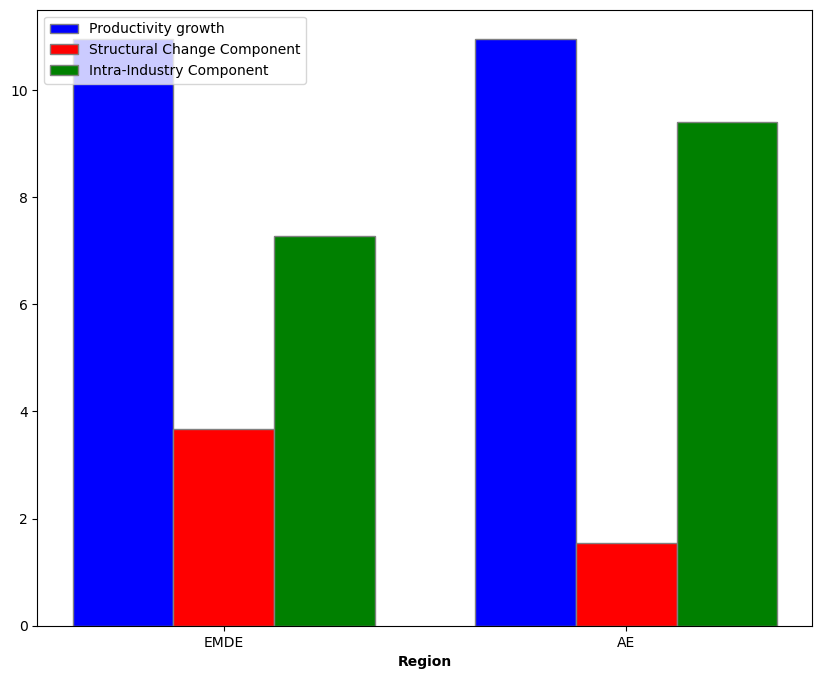

In [ ]:
#compute average of "prod_gr", "structuralchange", "within" by region
list5=['prod_gr', 'structuralchange', 'within']
for i in list5:
    df2_5yr_final[i+'_mean_region'] = df2_5yr_final.groupby('region2')[i].transform('mean')
mean_region=df2_5yr_final[['region2','prod_gr_mean_region','structuralchange_mean_region','within_mean_region']].drop_duplicates()

#make a multiple bar plot
fig, ax = plt.subplots()
barWidth = 0.25
bars1 = mean_region['prod_gr_mean_region']
bars2 = mean_region['structuralchange_mean_region']
bars3 = mean_region['within_mean_region']
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='grey', label='Productivity growth')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='grey', label='Structural Change Comonent')
plt.bar(r3, bars3, color='g', width=barWidth, edgecolor='grey', label='Intra-Industry Component')
plt.xlabel('Region', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], mean_region['region2'].unique())
plt.legend(['Productivity growth', 'Structural Change Component', 'Intra-Industry Component'], loc='upper left')




#shorten region names
'Latin America and the Caribbean':'LAC',

'Africa': 'AFR',
 'Advanced Economies':'AE',
'Europe and Central Asia':'ECA',
'South Asia':'SA',
'East Asia and Pacific':'EAP',
'Middle East':'ME'}, inplace=True)

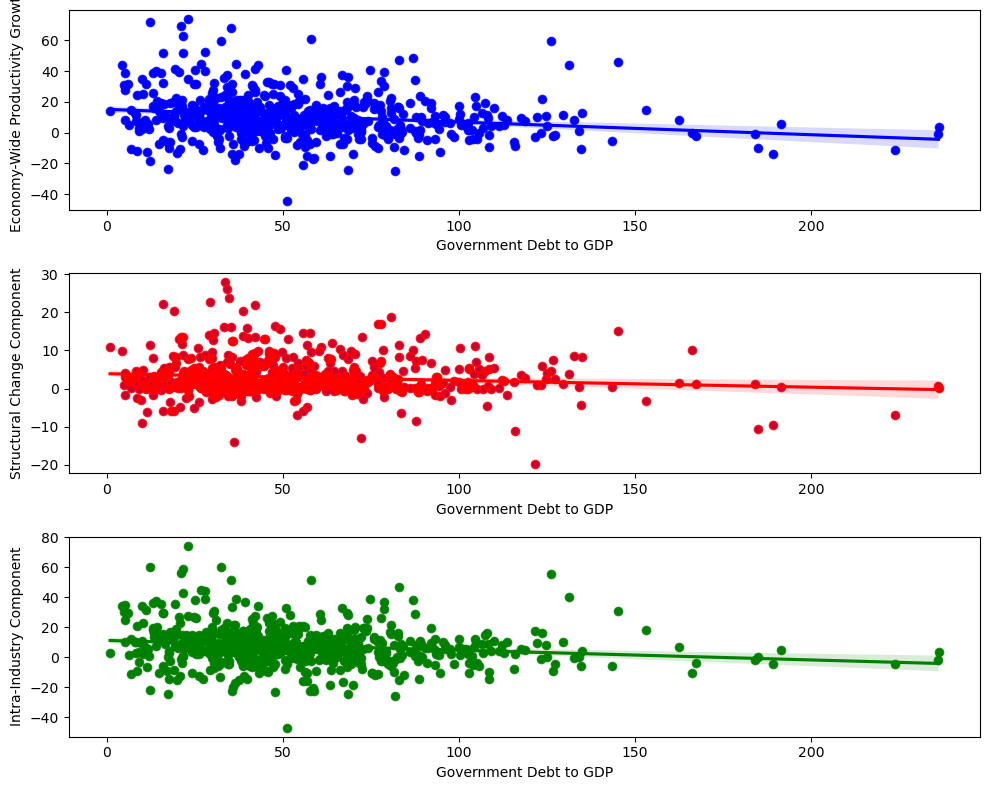

In [ ]:
#plot subplots scatter plot of productivity growth components and trade openness using seaborn
import seaborn as sns
fig, axs = plt.subplots(3, 1)
sns.scatterplot(data=df3, x='government_gross_debt_gdp', y='prod_gr', ax=axs[0], color='b')
#add a line of best fit
sns.regplot(data=df3, x='government_gross_debt_gdp', y='prod_gr', ax=axs[0], color='b')
#change label the axes
axs[0].xaxis.set_label_text('Government Debt to GDP')
axs[0].yaxis.set_label_text('Economy-Wide Productivity Growth')

sns.scatterplot(data=df3, x='government_gross_debt_gdp', y='structuralchange', ax=axs[1], color='b')
sns.regplot(data=df3, x='government_gross_debt_gdp', y='structuralchange', ax=axs[1], color='r')

axs[1].xaxis.set_label_text('Government Debt to GDP')
axs[1].yaxis.set_label_text('Structural Change Component')

sns.scatterplot(data=df3, x='government_gross_debt_gdp', y='within', ax=axs[2], color='g')
sns.regplot(data=df3, x='government_gross_debt_gdp', y='within', ax=axs[2], color='g')

axs[2].xaxis.set_label_text('Government Debt to GDP')
axs[2].yaxis.set_label_text('Intra-Industry Component')
#increase the space between the subplots
plt.tight_layout()
plt.show()



In [ ]:
df2_5yr_final.columns

Index(['country', 'year', 'region', 'AGRva', 'AGRemp', 'MANva', 'MANemp',
       'SERva', 'SERemp', 'TOTva', 'TOTemp', 'AGRp', 'MANp', 'SERp',
       'AGRempshare', 'MANempshare', 'SERempshare', 'AGRagg', 'MANagg',
       'SERagg', 'AGGprod', 'AGRpchange', 'MANpchange', 'SERpchange', 'lagg',
       'AGRlagempshare', 'MANlagempshare', 'SERlagempshare', 'AGRtech',
       'MANtech', 'SERtech', 'within_gr', 'within', 'AGRcempshare',
       'MANcempshare', 'SERcempshare', 'AGRsch', 'MANsch', 'SERsch',
       'structuralchange_gr', 'structuralchange', 'prod', 'prod_gr', 'diff',
       'within_share', 'structural_share', 'human_capital', 'log_gdppc',
       'pop_gr', 'TFP', 'log_cap_stock', 'government_gross_debt_gdp',
       'trade_openness', 'initial_gdp_pc', 'log_initial_gdp_pc',
       'AGRtech_mean', 'MANtech_mean', 'SERtech_mean', 'AGRsch_mean',
       'MANsch_mean', 'SERsch_mean', 'AGRempshare_mean', 'MANempshare_mean',
       'SERempshare_mean', 'AGRva_mean', 'MANva_mean', 'SERva_mean

In [ ]:
df3.columns

Index(['country', 'year', 'region', 'within', 'structuralchange', 'prod_gr',
       'government_gross_debt_gdp', 'trade_openness', 'initial_gdp_pc',
       'log_initial_gdp_pc', 'log_cap_stock', 'log_gdppc', 'pop_gr', 'TFP',
       'human_capital'],
      dtype='object')

In [ ]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split



In [ ]:
# # Function to interpolate missing values using RandomForestRegressor
# def interpolate_group(group):
#     for column in ['government_gross_debt_gdp', 'trade_openness','human_capital','TFP']:
#         # Create a copy to avoid modifying the original group
#         temp_group = group.copy()
        
#         # Split the data into training (non-missing) and testing (missing) sets
#         not_missing = temp_group[column].notnull()
#         X_train = temp_group.loc[not_missing, ['year']]
#         y_train = temp_group.loc[not_missing, column]
#         X_test = temp_group.loc[~not_missing, ['year']]
        
#         # Check if there are enough samples to train the model and make predictions
#         if not X_train.empty and not X_test.empty:
#             # Train the model
#             model = RandomForestRegressor()
#             model.fit(X_train, y_train)
            
#             # Predict missing values
#             temp_group.loc[~not_missing, column] = model.predict(X_test)
            
#             # Update the group with filled values
#             group[column] = temp_group[column]
        
#         # Fallback: Fill remaining missing values using linear interpolation
#         group[column] = group[column].interpolate(method='nearest')
    
#     return group

# # Apply the interpolation function to each panel unit
# df_interpolated = df3.groupby('country').apply(interpolate_group).reset_index(drop=True)

# print(df_interpolated)

In [ ]:
# #from xgboost import XGBRegressor

# #def interpolate_group(group):
#     for column in ['government_gross_debt_gdp', 'trade_openness']:
#         temp_group = group.copy()
#         not_missing = temp_group[column].notnull()
#         X_train = temp_group.loc[not_missing, ['year']]
#         y_train = temp_group.loc[not_missing, column]
#         X_test = temp_group.loc[~not_missing, ['year']]
        
#         if not X_train.empty and not X_test.empty:
#             model = XGBRegressor()
#             model.fit(X_train, y_train)
#             temp_group.loc[~not_missing, column] = model.predict(X_test)
#             group[column] = temp_group[column]
        
#         group[column] = group[column].interpolate(method='linear')
    
#     return group

# df_interpolated = df3.groupby('country').apply(interpolate_group).reset_index(drop=True)
# print(df_interpolated)

In [ ]:
#check for missing values
df3.isnull().sum()

country                        0
year                           0
region                         0
within                       103
structuralchange             103
prod_gr                      103
government_gross_debt_gdp    115
trade_openness               120
initial_gdp_pc                37
log_initial_gdp_pc            37
log_cap_stock                 10
log_gdppc                     33
pop_gr                        33
TFP                          106
human_capital                 30
dtype: int64

In [ ]:

#ols regression of government debt on the components of productivity growth
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
intercept=df3['intercept']=1
X1 = df3[['government_gross_debt_gdp', 'log_initial_gdp_pc','pop_gr','human_capital', 'trade_openness', 'log_cap_stock','intercept']]
y1 = df3['prod_gr']
y2 = df3['structuralchange']
y3 = df3['within']
model1 = sm.OLS(y1, X1, missing='drop').fit()
robust_model1 = model1.get_robustcov_results()
model2 = sm.OLS(y2, X1, missing='drop').fit()
robust_model2 = model2.get_robustcov_results()
model3= sm.OLS(y3, X1, missing='drop').fit()
robust_model3 = model3.get_robustcov_results()

/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_26873/3724760746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intercept=df3['intercept']=1


In [ ]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[robust_model1,robust_model2,robust_model3],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['prod_gr',
                                         'structuralchange',
                                         'within'],
                            info_dict=info_dict,
                            regressor_order=['intercept',
                                             'government_gross_debt_gdp ',
                                             'log_initial_real_gdp_pc',
                                             'pop_growth',
                                             'human_capital',
                                            'trade_openness',
                                            'log_capital_stock'])

results_table.add_title('Table 1 - OLS Regressions')
print(results_table)

                     Table 1 - OLS Regressions
                            prod_gr    structuralchange    within   
--------------------------------------------------------------------
intercept                 45.1361***   15.1625***       29.9736***  
                          (8.1739)     (3.0442)         (7.5031)    
human_capital             0.9856       -0.8145          1.8001      
                          (1.6669)     (0.6262)         (1.5534)    
trade_openness            0.0462***    0.0027           0.0435***   
                          (0.0112)     (0.0030)         (0.0110)    
government_gross_debt_gdp -0.0861***   -0.0106          -0.0755***  
                          (0.0166)     (0.0070)         (0.0138)    
log_initial_gdp_pc        -5.2467***   -1.7348***       -3.5119***  
                          (1.1273)     (0.4210)         (1.0252)    
pop_gr                    -210.1955*** -11.6615         -198.5341***
                          (65.8192)    (20.8361)        

In [ ]:
#estimate a panel data model using fixed effects
import linearmodels as lm
#declare data as panel data
df3 = df3.set_index(['country', 'year'])
#df_interpolated = df_interpolated.set_index(['country', 'year'])
from IPython.display import display, HTML

# Fit your models
res1 = lm.PanelOLS.from_formula('prod_gr ~ 1  +government_gross_debt_gdp  + pop_gr + human_capital    + trade_openness + log_cap_stock +log_initial_gdp_pc     + TimeEffects + EntityEffects', df3).fit(cov_type='robust')
res2 = lm.PanelOLS.from_formula('structuralchange ~ 1 +government_gross_debt_gdp  + pop_gr + human_capital + trade_openness  + log_cap_stock + log_initial_gdp_pc   + TimeEffects + EntityEffects', df3).fit(cov_type='robust')
res3 = lm.PanelOLS.from_formula('within ~ 1  +government_gross_debt_gdp + pop_gr + human_capital   + trade_openness + log_cap_stock + log_initial_gdp_pc     + TimeEffects + EntityEffects', df3).fit(cov_type='robust')

# Get the summaries as HTML
summary1 = res1.summary.as_html()
summary2 = res2.summary.as_html()
summary3 = res3.summary.as_html()

# Concatenate the summaries and display them

summary_html = '<table><tr><td>' + summary1 + '</td><td>' + summary2 + '</td><td>' + summary3 + '</td></tr></table>'
#add a title to the table
summary_html = '<h2>Panel Data Regressions(5 year Intervals)</h2>' + summary_html
display(HTML(summary_html))


/Users/preciousallor/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/preciousallor/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/preciousallor/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Dep. Variable:,prod_gr,R-squared:,0.0953
Estimator:,PanelOLS,R-squared (Between):,-2.1882
No. Observations:,544,R-squared (Within):,0.1092
Date:,"Mon, Jul 01 2024",R-squared (Overall):,-0.8200
Time:,02:46:55,Log-likelihood,-2043.1
Cov. Estimator:,Robust,,
,,F-statistic:,7.7980
Entities:,85,P-value,0.0000
Avg Obs:,6.4000,Distribution:,"F(6,444)"
Min Obs:,1.0000,,
Max Obs:,10.0000,F-statistic (robust):,6.3171


In [ ]:
#Now Estimating the System GMM model
from  pydynpd import regression
#reset index
df3.reset_index(inplace=True)



In [ ]:
command_str1='prod_gr L(1:1).prod_gr log_initial_gdp_pc government_gross_debt_gdp pop_gr human_capital  trade_openness log_cap_stock  | gmm(prod_gr, 3:3) gmm(government_gross_debt_gdp pop_gr human_capital  trade_openness log_cap_stock , 2:4)  |   timedumm collapse'
prod = regression.abond(command_str1, df3, ['country', 'year'])

 Dynamic panel-data estimation, two-step system GMM
 Group variable: country                          Number of obs = 390     
 Time variable: year                              Min obs per group: 0    
 Number of instruments = 35                       Max obs per group: 11   
 Number of groups = 103                           Avg obs per group: 3.79 
+---------------------------+--------------+---------------------+------------+-----------+-----+
|          prod_gr          |    coef.     | Corrected Std. Err. |     z      |   P>|z|   |     |
+---------------------------+--------------+---------------------+------------+-----------+-----+
|         L1.prod_gr        |  0.2463091   |      0.1176517      | 2.0935440  | 0.0363006 |  *  |
|     log_initial_gdp_pc    |  1.9830768   |      2.1593467      | 0.9183689  | 0.3584258 |     |
| government_gross_debt_gdp |  -0.1317443  |      0.0472538      | -2.7880168 | 0.0053032 |  ** |
|           pop_gr          | -390.6108749 |      97.5945749

In [ ]:
command_str1='structuralchange L(1:1).structuralchange log_initial_gdp_pc government_gross_debt_gdp pop_gr human_capital  trade_openness log_cap_stock  | gmm(structuralchange, 3:3) gmm(government_gross_debt_gdp pop_gr human_capital  trade_openness log_cap_stock , 2:4)  |  timedumm collapse'
struc = regression.abond(command_str1, df3, ['country', 'year'])

 Dynamic panel-data estimation, two-step system GMM
 Group variable: country                          Number of obs = 390     
 Time variable: year                              Min obs per group: 0    
 Number of instruments = 35                       Max obs per group: 11   
 Number of groups = 103                           Avg obs per group: 3.79 
+---------------------------+-------------+---------------------+------------+-----------+---+
|      structuralchange     |    coef.    | Corrected Std. Err. |     z      |   P>|z|   |   |
+---------------------------+-------------+---------------------+------------+-----------+---+
|    L1.structuralchange    |  -0.3567247 |      0.4793253      | -0.7442226 | 0.4567418 |   |
|     log_initial_gdp_pc    |  -0.8679105 |      1.5064194      | -0.5761414 | 0.5645196 |   |
| government_gross_debt_gdp |  -0.0365130 |      0.0327872      | -1.1136359 | 0.2654354 |   |
|           pop_gr          | -78.3419616 |     105.5122512     | -0.7424916 |

In [ ]:
command_str1='within L(1:1).within log_initial_gdp_pc government_gross_debt_gdp pop_gr human_capital  trade_openness log_cap_stock  | gmm(within, 3:3) gmm(government_gross_debt_gdp pop_gr human_capital  trade_openness log_cap_stock , 2:4)  | timedumm collapse'
within = regression.abond(command_str1, df3, ['country', 'year'])

 Dynamic panel-data estimation, two-step system GMM
 Group variable: country                          Number of obs = 390     
 Time variable: year                              Min obs per group: 0    
 Number of instruments = 35                       Max obs per group: 11   
 Number of groups = 103                           Avg obs per group: 3.79 
+---------------------------+--------------+---------------------+------------+-----------+----+
|           within          |    coef.     | Corrected Std. Err. |     z      |   P>|z|   |    |
+---------------------------+--------------+---------------------+------------+-----------+----+
|         L1.within         |  0.0928282   |      0.1431410      | 0.6485087  | 0.5166560 |    |
|     log_initial_gdp_pc    |  2.9230262   |      2.4612901      | 1.1875992  | 0.2349913 |    |
| government_gross_debt_gdp |  -0.1301391  |      0.0513992      | -2.5319263 | 0.0113438 | *  |
|           pop_gr          | -334.3959208 |     110.0092813     |

#### Bias Corrected LSDVC

In [ ]:
import pandas as pd
import ipystata  
from ipystata.config import config_stata  
config_stata('/Applications/Stata/StataSE.app/Contents/MacOS/stataSE')

IPyStata is loaded in batch mode.


In [ ]:
%%stata -d df3


UsageError: %%stata is a cell magic, but the cell body is empty.


In [ ]:
%%stata -d df3
encode country, gen(country2)
xtset country2 year, delta (5)
#generate year dummies
tab year, gen(yr)
xtlsdvc prod_gr log_initial_gdp_pc government_gross_debt_gdp pop_gr human_capital  trade_openness log_cap_stock yr1-yr14, initial(ah) first bias(3) vcov(100)
cd "/Users/preciousallor/Library/CloudStorage/OneDrive-KansasStateUniversity/Documents - William Blankenau's files/allor/Data/Totals"
outreg2 using tables.tex, replace  label  addnote("The dependent variable in the first column is productivity growth, in the second column is the structural change component and in the third column is the intra-industry component. The regressors are the initial log of real GDP per capita, government debt to GDP, population growth, human capital, trade openness, log of capital stock and year dummies. The regressions are estimated using the system GMM estimator with 3 lags of the dependent variable and 2-4 lags of the regressors. The standard errors are robust and clustered at the country level. The regressions include country and year fixed effects. The sample is for 5 year intervals from 1960 to 2015.")



Panel variable: country2 (unbalanced)
 Time variable: year, 1950 to 2015
         Delta: 5 units
Unknown #command
       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1950 |          4        0.49        0.49
       1955 |          6        0.74        1.23
       1960 |         14        1.72        2.94
       1965 |         20        2.45        5.40
       1970 |         45        5.52       10.92
       1975 |         54        6.63       17.55
       1980 |         55        6.75       24.29
       1985 |         55        6.75       31.04
       1990 |         62        7.61       38.65
       1995 |         94       11.53       50.18
       2000 |         97       11.90       62.09
       2005 |        103       12.64       74.72
       2010 |        103       12.64       87.36
       2015 |        103       12.64      100.00
------------+-----------------------------------
      Total |        815      100.00
note: variable 

In [ ]:
%%stata -d df3
encode country, gen(country2)
xtset country2 year, delta (5)
#generate year dummies
tab year, gen(yr)
xtlsdvc structuralchange log_initial_gdp_pc government_gross_debt_gdp pop_gr human_capital  trade_openness log_cap_stock yr1-yr14, initial(ab) first bias(3) vcov(100)
cd "/Users/preciousallor/Library/CloudStorage/OneDrive-KansasStateUniversity/Documents - William Blankenau's files/allor/Data/Totals"
outreg2 using tables.tex, append  label  addnote("The dependent variable in the first column is productivity growth, in the second column is the structural change component and in the third column is the intra-industry component. The regressors are the initial log of real GDP per capita, government debt to GDP, population growth, human capital, trade openness, log of capital stock and year dummies. The regressions are estimated using the system GMM estimator with 3 lags of the dependent variable and 2-4 lags of the regressors. The standard errors are robust and clustered at the country level. The regressions include country and year fixed effects. The sample is for 5 year intervals from 1960 to 2015.")



Panel variable: country2 (unbalanced)
 Time variable: year, 1950 to 2015
         Delta: 5 units
Unknown #command
       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1950 |          4        0.49        0.49
       1955 |          6        0.74        1.23
       1960 |         14        1.72        2.94
       1965 |         20        2.45        5.40
       1970 |         45        5.52       10.92
       1975 |         54        6.63       17.55
       1980 |         55        6.75       24.29
       1985 |         55        6.75       31.04
       1990 |         62        7.61       38.65
       1995 |         94       11.53       50.18
       2000 |         97       11.90       62.09
       2005 |        103       12.64       74.72
       2010 |        103       12.64       87.36
       2015 |        103       12.64      100.00
------------+-----------------------------------
      Total |        815      100.00
note: variable 

In [ ]:
%%stata -d df3
encode country, gen(country2)
xtset country2 year, delta (5)
#generate year dummies
tab year, gen(yr)
xtlsdvc within log_initial_gdp_pc government_gross_debt_gdp pop_gr human_capital  trade_openness log_cap_stock yr1-yr14, initial(ah) first bias(3) vcov(100)
cd "/Users/preciousallor/Library/CloudStorage/OneDrive-KansasStateUniversity/Documents - William Blankenau's files/allor/Data/Totals"
outreg2 using tables.tex, append label  addnote("The dependent variable in the first column is productivity growth, in the second column is the structural change component and in the third column is the intra-industry component. The regressors are the initial log of real GDP per capita, government debt to GDP, population growth, human capital, trade openness, log of capital stock and year dummies. The regressions are estimated using the system GMM estimator with 3 lags of the dependent variable and 2-4 lags of the regressors. The standard errors are robust and clustered at the country level. The regressions include country and year fixed effects. The sample is for 5 year intervals from 1960 to 2015.")


Panel variable: country2 (unbalanced)
 Time variable: year, 1950 to 2015
         Delta: 5 units
Unknown #command
       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1950 |          4        0.49        0.49
       1955 |          6        0.74        1.23
       1960 |         14        1.72        2.94
       1965 |         20        2.45        5.40
       1970 |         45        5.52       10.92
       1975 |         54        6.63       17.55
       1980 |         55        6.75       24.29
       1985 |         55        6.75       31.04
       1990 |         62        7.61       38.65
       1995 |         94       11.53       50.18
       2000 |         97       11.90       62.09
       2005 |        103       12.64       74.72
       2010 |        103       12.64       87.36
       2015 |        103       12.64      100.00
------------+-----------------------------------
      Total |        815      100.00
note: variable 

#### Estimating Thrrshold effects.
First method is to introduce the squared term of government debt 

second strategy is to introduce the 30 60 90 debt thresholds.


In [ ]:
##With squared term of government debt
df3['debtsq']=df3['government_gross_debt_gdp']**2
# Fit your models



In [ ]:
#ols regression of government debt on the components of productivity growth
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
intercept=df3['intercept']=1
X1 = df3[['government_gross_debt_gdp', 'debtsq', 'log_initial_gdp_pc','pop_gr','human_capital', 'trade_openness', 'log_cap_stock','intercept']]
y1 = df3['prod_gr']
y2 = df3['structuralchange']
y3 = df3['within']
model1 = sm.OLS(y1, X1, missing='drop').fit()
robust_model1 = model1.get_robustcov_results()
model2 = sm.OLS(y2, X1, missing='drop').fit()
robust_model2 = model2.get_robustcov_results()
model3= sm.OLS(y3, X1, missing='drop').fit()
robust_model3 = model3.get_robustcov_results()

In [ ]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[robust_model1,robust_model2,robust_model3],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['prod_gr',
                                         'structuralchange',
                                         'within'],
                            info_dict=info_dict,
                            regressor_order=['intercept',
                                             'government_gross_debt_gdp ',
                                             'log_initial_real_gdp_pc',
                                             'pop_growth',
                                             'human_capital',
                                            'trade_openness',
                                            'log_capital_stock'])

results_table.add_title('Table 1 - OLS Regressions')
print(results_table)

                     Table 1 - OLS Regressions
                            prod_gr    structuralchange    within   
--------------------------------------------------------------------
intercept                 45.5454***   14.9481***       30.5972***  
                          (8.2097)     (3.0749)         (7.5076)    
human_capital             0.8629       -0.7502          1.6131      
                          (1.6799)     (0.6194)         (1.5675)    
trade_openness            0.0469***    0.0023           0.0446***   
                          (0.0114)     (0.0031)         (0.0112)    
government_gross_debt_gdp -0.1178***   0.0060           -0.1238***  
                          (0.0433)     (0.0155)         (0.0379)    
debtsq                    0.0002       -0.0001          0.0003*     
                          (0.0002)     (0.0001)         (0.0002)    
log_initial_gdp_pc        -5.2004***   -1.7590***       -3.4413***  
                          (1.1267)     (0.4176)         

In [ ]:
%%stata -d df3
reg prod_gr government_gross_debt_gdp debtsq log_initial_gdp_pc pop_gr human_capital trade_openness log_cap_stock,r
outreg2 using table2.tex, replace ctitle("Table 2 - OLS Regressions") label  
reg structuralchange government_gross_debt_gdp debtsq log_initial_gdp_pc pop_gr human_capital trade_openness log_cap_stock,r
outreg2 using table2.tex, append ctitle("Table 2 - OLS Regressions") label
reg within government_gross_debt_gdp debtsq log_initial_gdp_pc pop_gr human_capital trade_openness log_cap_stock,r
outreg2 using table2.tex, append ctitle("Table 2 - OLS Regressions") label



Linear regression                               Number of obs     =        544
                                                F(7, 536)         =       9.61
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1259
                                                Root MSE          =     12.823

-------------------------------------------------------------------------------------------
                          |               Robust
                  prod_gr | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
--------------------------+----------------------------------------------------------------
government_gross_debt_gdp |   -.117779   .0432718    -2.72   0.007    -.2027821   -.0327759
                   debtsq |   .0001914   .0002126     0.90   0.368    -.0002262     .000609
       log_initial_gdp_pc |  -5.200371   1.126692    -4.62   0.000    -7.413646   -2.987097
  

In [ ]:
#estimate a panel data model using fixed effects
import linearmodels as lm
#declare data as panel data
df3 = df3.set_index(['country', 'year'])
#df_interpolated = df_interpolated.set_index(['country', 'year'])
from IPython.display import display, HTML

# Fit your models
res1 = lm.PanelOLS.from_formula('prod_gr ~ 1  +government_gross_debt_gdp +debtsq  + pop_gr + human_capital    + trade_openness + log_cap_stock +log_initial_gdp_pc     + TimeEffects + EntityEffects', df3).fit(cov_type='robust')
res2 = lm.PanelOLS.from_formula('structuralchange ~ 1 +government_gross_debt_gdp +debtsq  + pop_gr + human_capital + trade_openness  + log_cap_stock + log_initial_gdp_pc   + TimeEffects + EntityEffects', df3).fit(cov_type='robust')
res3 = lm.PanelOLS.from_formula('within ~ 1  +government_gross_debt_gdp +debtsq + pop_gr + human_capital   + trade_openness + log_cap_stock + log_initial_gdp_pc     + TimeEffects + EntityEffects', df3).fit(cov_type='robust')

# Get the summaries as HTML
summary1 = res1.summary.as_html()
summary2 = res2.summary.as_html()
summary3 = res3.summary.as_html()

# Concatenate the summaries and display them

summary_html = '<table><tr><td>' + summary1 + '</td><td>' + summary2 + '</td><td>' + summary3 + '</td></tr></table>'
#add a title to the table
summary_html = '<h2>Panel Data Regressions(5 year Intervals)</h2>' + summary_html
display(HTML(summary_html))


/Users/preciousallor/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/preciousallor/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/preciousallor/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Dep. Variable:,prod_gr,R-squared:,0.0959
Estimator:,PanelOLS,R-squared (Between):,-2.2089
No. Observations:,544,R-squared (Within):,0.1093
Date:,"Mon, Jul 01 2024",R-squared (Overall):,-0.8314
Time:,02:48:54,Log-likelihood,-2043.0
Cov. Estimator:,Robust,,
,,F-statistic:,6.7157
Entities:,85,P-value,0.0000
Avg Obs:,6.4000,Distribution:,"F(7,443)"
Min Obs:,1.0000,,
Max Obs:,10.0000,F-statistic (robust):,6.9625


In [ ]:

#create debt threshold dummies for 30%, 60% and 90% of GDP
df3['debt_30'] = (df3['government_gross_debt_gdp'] <= 30).astype(int)
df3['debt_30_60'] = ((df3['government_gross_debt_gdp'] > 30) & (df3['government_gross_debt_gdp'] <= 60)).astype(int)
df3['debt_60_90'] = ((df3['government_gross_debt_gdp'] > 60) & (df3['government_gross_debt_gdp'] <= 90)).astype(int)
df3['debt_90'] = (df3['government_gross_debt_gdp'] > 90).astype(int)
list(df3['debt_90'])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
#interact the debt threshold dummies with government debt
df3['debt_30_gdp'] = df3['government_gross_debt_gdp']*df3['debt_30']
df3['debt_30_60_gdp'] = df3['government_gross_debt_gdp']*df3['debt_30_60']
df3['debt_60_90_gdp'] = df3['government_gross_debt_gdp']*df3['debt_60_90']
df3['debt_90_gdp'] = df3['government_gross_debt_gdp']*df3['debt_90']

In [ ]:
%%stata -d df3
reg prod_gr  log_initial_gdp_pc pop_gr human_capital trade_openness log_cap_stock debt_30 debt_30_60_gdp debt_30_gdp debt_60_90 debt_90,r
outreg2 using table3.tex, replace ctitle("Table 3 - OLS Regressions") label
reg within  log_initial_gdp_pc pop_gr human_capital trade_openness log_cap_stock debt_30_60_gdp debt_30_gdp debt_60_90 debt_90,r
outreg2 using table3.tex, append ctitle("Table 3 - OLS Regressions") label
reg structuralchange  log_initial_gdp_pc pop_gr human_capital trade_openness log_cap_stock debt_30_60_gdp debt_30_gdp debt_60_90 debt_90,r
outreg2 using table3.tex, append ctitle("Table 3 - OLS Regressions") label


Linear regression                               Number of obs     =        544
                                                F(10, 533)        =       7.07
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1334
                                                Root MSE          =     12.804

------------------------------------------------------------------------------------
                   |               Robust
           prod_gr | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------------+----------------------------------------------------------------
log_initial_gdp_pc |   -4.96956   1.144825    -4.34   0.000    -7.218482   -2.720638
            pop_gr |  -221.3506    64.9842    -3.41   0.001    -349.0072   -93.69405
     human_capital |   .6057534   1.678506     0.36   0.718    -2.691545    3.903052
    trade_openness |   .0488985   .0113309     4.32

In [ ]:
#estimate a panel data model using fixed effects
import linearmodels as lm
#declare data as panel data
#df3 = df3.set_index(['country', 'year'])
#df_interpolated = df_interpolated.set_index(['country', 'year'])
from IPython.display import display, HTML

# Fit your models
res1 = lm.PanelOLS.from_formula('prod_gr ~ 1 + debt_30_60_gdp + debt_30_gdp + debt_60_90_gdp + debt_90_gdp   + pop_gr + human_capital    + trade_openness + log_cap_stock +log_initial_gdp_pc     + TimeEffects + EntityEffects', df3).fit(cov_type='robust')
res2 = lm.PanelOLS.from_formula('structuralchange ~ 1 + debt_30_60_gdp  + debt_30_gdp + debt_60_90_gdp + debt_90_gdp   + pop_gr + human_capital + trade_openness  + log_cap_stock + log_initial_gdp_pc   + TimeEffects + EntityEffects', df3).fit(cov_type='robust')
res3 = lm.PanelOLS.from_formula('within ~ 1  + debt_30_60_gdp + debt_30_gdp + debt_60_90_gdp + debt_90_gdp  + pop_gr + human_capital   + trade_openness + log_cap_stock + log_initial_gdp_pc     + TimeEffects + EntityEffects', df3).fit(cov_type='robust')

# Get the summaries as HTML
summary1 = res1.summary.as_html()
summary2 = res2.summary.as_html()
summary3 = res3.summary.as_html()

# Concatenate the summaries and display them

summary_html = '<table><tr><td>' + summary1 + '</td><td>' + summary2 + '</td><td>' + summary3 + '</td></tr></table>'
#add a title to the table
summary_html = '<h2>Panel Data Regressions(5 year Intervals)</h2>' + summary_html
display(HTML(summary_html))

/Users/preciousallor/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/preciousallor/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/preciousallor/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Dep. Variable:,prod_gr,R-squared:,0.1125
Estimator:,PanelOLS,R-squared (Between):,-2.2405
No. Observations:,544,R-squared (Within):,0.1268
Date:,"Mon, Jul 01 2024",R-squared (Overall):,-0.8243
Time:,02:48:57,Log-likelihood,-2037.9
Cov. Estimator:,Robust,,
,,F-statistic:,6.2118
Entities:,85,P-value,0.0000
Avg Obs:,6.4000,Distribution:,"F(9,441)"
Min Obs:,1.0000,,
Max Obs:,10.0000,F-statistic (robust):,7.3386


In [ ]:
#reset index
df3.reset_index(inplace=True)

In [ ]:
command_str1='prod_gr L(1:1).prod_gr log_initial_gdp_pc debt_30_60_gdp  debt_30_gdp debt_60_90_gdp debt_90_gdp pop_gr human_capital  trade_openness log_cap_stock  | gmm(prod_gr, 2:4) gmm( debt_30_60_gdp debt_30_gdp  debt_60_90_gdp debt_90_gdp  pop_gr human_capital  trade_openness log_cap_stock , 1:4)  |  timedumm collapse'
prod = regression.abond(command_str1, df3, ['country', 'year'])

 Dynamic panel-data estimation, two-step system GMM
 Group variable: country                          Number of obs = 390     
 Time variable: year                              Min obs per group: 0    
 Number of instruments = 58                       Max obs per group: 12   
 Number of groups = 103                           Avg obs per group: 3.79 
+--------------------+--------------+---------------------+------------+-----------+----+
|      prod_gr       |    coef.     | Corrected Std. Err. |     z      |   P>|z|   |    |
+--------------------+--------------+---------------------+------------+-----------+----+
|     L1.prod_gr     |  0.1833630   |      0.0981948      | 1.8673392  | 0.0618542 |    |
| log_initial_gdp_pc |  2.3814294   |      3.4567328      | 0.6889249  | 0.4908705 |    |
|   debt_30_60_gdp   |  -0.0390795  |      0.0843582      | -0.4632573 | 0.6431800 |    |
|    debt_30_gdp     |  0.2652089   |      0.1776728      | 1.4926812  | 0.1355207 |    |
|   debt_60_90_gdp

In [ ]:
command_str1='within L(1:1).within log_initial_gdp_pc debt_30_60_gdp  debt_30_gdp debt_60_90_gdp debt_90_gdp pop_gr human_capital  trade_openness log_cap_stock  | gmm(within, 2:4) gmm( debt_30_60_gdp debt_30_gdp  debt_60_90_gdp debt_90_gdp  pop_gr human_capital  trade_openness log_cap_stock , 1:5)  |  timedumm collapse'
within = regression.abond(command_str1, df3, ['country', 'year'])

 Dynamic panel-data estimation, two-step system GMM
 Group variable: country                          Number of obs = 390     
 Time variable: year                              Min obs per group: 0    
 Number of instruments = 66                       Max obs per group: 12   
 Number of groups = 103                           Avg obs per group: 3.79 
+--------------------+-------------+---------------------+------------+-----------+---+
|       within       |    coef.    | Corrected Std. Err. |     z      |   P>|z|   |   |
+--------------------+-------------+---------------------+------------+-----------+---+
|     L1.within      |  0.2018877  |      0.0788337      | 2.5609326  | 0.0104392 | * |
| log_initial_gdp_pc |  1.7191357  |      3.2976579      | 0.5213202  | 0.6021437 |   |
|   debt_30_60_gdp   |  -0.0484190 |      0.0885953      | -0.5465187 | 0.5847094 |   |
|    debt_30_gdp     |  0.2352553  |      0.1939352      | 1.2130614  | 0.2251064 |   |
|   debt_60_90_gdp   |  -0.06483

In [ ]:
command_str1='structuralchange L(1:1).structuralchange log_initial_gdp_pc debt_30_60_gdp  debt_30_gdp debt_60_90_gdp debt_90_gdp pop_gr human_capital  trade_openness log_cap_stock  | gmm(structuralchange, 2:3) gmm( debt_30_60_gdp debt_30_gdp  debt_60_90_gdp debt_90_gdp  pop_gr human_capital  trade_openness log_cap_stock , 1:3)  |  timedumm collapse'
struc = regression.abond(command_str1, df3, ['country', 'year'])

 Dynamic panel-data estimation, two-step system GMM
 Group variable: country                          Number of obs = 390     
 Time variable: year                              Min obs per group: 0    
 Number of instruments = 49                       Max obs per group: 12   
 Number of groups = 103                           Avg obs per group: 3.79 
+---------------------+-------------+---------------------+------------+-----------+-----+
|   structuralchange  |    coef.    | Corrected Std. Err. |     z      |   P>|z|   |     |
+---------------------+-------------+---------------------+------------+-----------+-----+
| L1.structuralchange |  0.0567599  |      0.0960876      | 0.5907096  | 0.5547150 |     |
|  log_initial_gdp_pc |  -0.3742699 |      1.4218285      | -0.2632314 | 0.7923722 |     |
|    debt_30_60_gdp   |  -0.0013036 |      0.0401608      | -0.0324589 | 0.9741061 |     |
|     debt_30_gdp     |  -0.0138115 |      0.0696432      | -0.1983185 | 0.8427959 |     |
|    debt_6

In [ ]:
%%stata -d df3
encode country, gen(country2)
xtset country2 year, delta (5)
#generate year dummies
tab year, gen(yr)
xtlsdvc prod_gr log_initial_gdp_pc debt_30_60_gdp  debt_30_gdp debt_60_90_gdp debt_90_gdp pop_gr human_capital  trade_openness log_cap_stock yr1-yr14, initial(ab) first bias(3) vcov(100)
xtlsdvc structuralchange log_initial_gdp_pc debt_30_60_gdp  debt_30_gdp debt_60_90_gdp debt_90_gdp pop_gr human_capital  trade_openness log_cap_stock yr1-yr14, initial(ab) first bias(3) vcov(100)
xtlsdvc within log_initial_gdp_pc debt_30_60_gdp  debt_30_gdp debt_60_90_gdp debt_90_gdp pop_gr human_capital  trade_openness log_cap_stock yr1-yr14, initial(ab) first bias(3) vcov(100)



Panel variable: country2 (unbalanced)
 Time variable: year, 1950 to 2015
         Delta: 5 units
Unknown #command
       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1950 |          4        0.49        0.49
       1955 |          6        0.74        1.23
       1960 |         14        1.72        2.94
       1965 |         20        2.45        5.40
       1970 |         45        5.52       10.92
       1975 |         54        6.63       17.55
       1980 |         55        6.75       24.29
       1985 |         55        6.75       31.04
       1990 |         62        7.61       38.65
       1995 |         94       11.53       50.18
       2000 |         97       11.90       62.09
       2005 |        103       12.64       74.72
       2010 |        103       12.64       87.36
       2015 |        103       12.64      100.00
------------+-----------------------------------
      Total |        815      100.00
note: variable 

In [ ]:
# Step 1: Count the number of observations for each 'user_id'
counts = df3.groupby('country').size()

# Step 2: Identify the minimum number of observations
min_count = counts.min()
max_count = counts.max()
mod_count = counts.mode()[0]

# Step 3: Identify the 'user_id's that have the minimum number of observations
balanced_ids = counts[counts == mod_count].index

# Step 4: Keep only the rows with 'user_id' in 'balanced_ids'
df3_balanced = df3[df3['country'].isin(balanced_ids)]


In [ ]:
df3_balanced['country'].nunique()

32

In [ ]:
#export data to stata
df3_balanced.to_stata(path+'df3_balanced.dta', write_index=False)
df3.to_stata(path+'df3.dta', write_index=False)

In [ ]:
%%stata -d df3
encode country, gen(country2)
xtset country2 year, delta (5)
xtendothresdpd  prod_gr L.prod_gr trade_openness log_initial_gdp_pc log_cap_stock human_capital pop_gr,thresv(government_gross_debt_gdp) stub(enr) pivar(government_gross_debt_gdp) dgmmiv(prod_gr human_capital pop_gr trade_openness log_initial_gdp_pc log_cap_stock government_gross_debt_gdp)  vce(robust)
xtendothresdpd  within L.within trade_openness log_initial_gdp_pc log_cap_stock human_capital pop_gr,thresv(government_gross_debt_gdp) stub(enr) pivar(government_gross_debt_gdp) dgmmiv(within human_capital pop_gr trade_openness log_initial_gdp_pc log_cap_stock government_gross_debt_gdp)  vce(robust)
xtendothresdpd  structuralchange L.structuralchange trade_openness log_initial_gdp_pc log_cap_stock human_capital pop_gr,thresv(government_gross_debt_gdp) stub(enr) pivar(government_gross_debt_gdp) dgmmiv(structuralchange human_capital pop_gr trade_openness log_initial_gdp_pc log_cap_stock government_gross_debt_gdp)  vce(robust)


Panel variable: country2 (unbalanced)
 Time variable: year, 1950 to 2015
         Delta: 5 units
> an_capital pop_gr trade_openness log_initial_gdp_pc log_cap_stock government_gross_debt_gdp)  vce(robust)

Performing Dynamic Panel Data Threshold Effects with
Endogenous Regressors Estimations.
This may take some time, please wait.


Dynamic panel-data estimation                   Number of obs     =        477
Group variable: country2                        Number of groups  =         85
Time variable: year
                                                Obs per group:
                                                              min =          1
                                                              avg =   5.611765
                                                              max =         10

Number of instruments =    352                  Wald chi2(8)      =      70.12
                                                Prob > chi2       =     0.0000
One-step results
           

#### Annual Data